<a href="https://colab.research.google.com/github/dudinkasg/Bootcamp_TurmaNoite/blob/main/C%C3%B3pia_de_Projeto_de_meio_de_curso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Enunciado**

Usando os dados dessa base de dados, você irá:

Importe os dados em notebook e atribua à variável chipo.

Selecione e mostre as 10 primeiras entradas.

Quantas observações estão presentes neste DataSet?

Qual o número de colunas neste DataSet?

Qual o nome de todas as colunas deste DataSet?

Qual o produto mais pedido? Quantas vezes ele foi pedido?

Qual foi o pedido mais pedido dentro da coluna choice_description?

Quantos itens foram pedidos no total?

Qual foi o valor recebido para o período representado nessa base de dados?

Qual a média do valor recebido por pedido?

Quantos itens diferentes estão esgotados?

Quantos produtos custam mais de $10?

Qual o preço para cada um deles?

Ordene os itens que custam mais de $10 por ordem alfabética.

Quantas vezes o item mais caro foi pedido?

Quantas vezes uma Veggie Salad Bowl foi pedida?

Crie um histograma com os 5 produtos mais pedidos.

Crie um gráfico de espalhamento onde em um eixo está o número de vezes que um pedido foi realizado e no outro eixo está o preço do produto.

Baseado no gráfico gerado, os dois eixos estão correlacionados? Justifique.

---



In [1]:
#importando a biblioteca pandas
import pandas as pd
import numpy as np

In [2]:
# A.Importando os dados em notebook para  a variável url
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

In [3]:
# A. Atribuindo os dados à variável chipo
chipo = pd.read_table(url)

In [4]:
# B.Exibindo as 10 primeiras entradas do dataset
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [21]:
# C.Retornando o número de observações
chipo.shape[0]

4622

In [22]:
# D.Retornando o número de colunas
chipo.shape[1]

5

In [23]:
# E.Retornando o nome de todas as colunas deste DataSet
# Maneira 1
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [24]:
# E.Retornando o nome de todas as colunas deste DataSet
# Maneira 2
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [12]:
# F.Retornando o o produto mais pedido e quantas vezes ele foi pedido
# Maneira 1

#atribuindo a uma variável a série contendo o nome dos itens e o respectivo número total de vezes que esse item foi pedido
itens_qnt_tot = chipo.groupby('item_name')['quantity'].sum()
itens_qnt_tot_sort = itens_qnt_tot.sort_values(ascending=False)
itens_qnt_tot_sort.head(1)

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

In [26]:
chipo[(chipo.item_name == 'coke')].item_price.unique()

array([], dtype=object)

In [27]:
# F.Maneira 2
#atribuindo a uma variável as séries contendo o nome dos itens e o respectivo número total de vezes que esse item foi pedido
itens_qnt_tot = chipo.groupby('item_name')['quantity'].sum()
#atribuindo à uma variavel o nome do produto mais pedido
prod_mais = itens_qnt_tot.idxmax()
#atribuindo à uma variavel a quantidade do item que foi mais pedido
quant_prod_mais = itens_qnt_tot.max()
#imrpimindo o valor
print("O produto mais pedido foi", prod_mais, "pedido", quant_prod_mais, "vezes.")

O produto mais pedido foi Chicken Bowl pedido 761 vezes.


In [28]:
# F.Maneira 3
#atribuindo a uma variável as séries contendo o nome dos itens e o respectivo número total de vezes que esse item foi pedido
itens_qnt_tot = chipo.groupby('item_name')['quantity'].sum()
#atribuindo à uma variavel o nome do produto mais pedido
prod_mais = itens_qnt_tot.idxmax()
#atribuindo à uma variavel a quantidade do item que foi mais pedido
quant_prod_mais = itens_qnt_tot.max()
# Usando .loc para obter a série correspondente ao item mais pedido
itens_qnt_tot.loc[prod_mais]

761

In [31]:
# G.Qual foi o pedido mais pedido dentro da coluna choice_description
col_choicedesc_mais = chipo.groupby('choice_description')['quantity'].sum()
col_choicedesc_mais_sort = col_choicedesc_mais.sort_values(ascending=False)
col_choicedesc_mais_sort.head(1)

choice_description
[Diet Coke]    159
Name: quantity, dtype: int64

In [32]:
# H.Número de itens pedidos no total
chipo['quantity'].sum()

4972

In [35]:
# I.Valor recebido para o período representado nessa base de dados
#atribuindo o dataset em uma outra variável para poder alterá-la, sem alterar o dado original
chipo2 = chipo

# Removendo o símbolo '$' e convertendo a coluna 'item_price' em float
chipo2['item_price'] = chipo2['item_price'].replace('$', '').astype(float)

# Calculando o preço total para cada item no dataset
chipo2['preco_mult_no_itens'] = chipo2['quantity'] * chipo2['item_price']

# Calcula a soma total dos preços multiplicados pelas quantidades
total = chipo2['preco_mult_no_itens'].sum()
total

ValueError: ignored

In [17]:
# I.Valor recebido para o período representado nessa base de dados
item_price_float = chipo['item_price']
item_price_float



0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

In [19]:
# J.Retornando a média do valor recebido por pedido
valor_por_pedido = chipo.groupby('order_id')['item_price'].sum()
valor_por_pedido.mean()

TypeError: ignored

In [44]:
# K.Quantos itens diferentes estão esgotados?
# Não é possível responder a essa questão.

In [43]:
# L.Retornando quantos produtos custam mais de $10

# Filtrar as linhas únicas pelo nome do item
#itens_unicos = chipo.drop_duplicates(subset=['item_name'])

# Contar quantos deles custam mais de 10
itens_mais_dez = chipo2['item_price'] > 10
quantidade_itens_mais_dez = itens_mais_dez.sum()
quantidade_itens_mais_dez


TypeError: ignored

In [ ]:
# M.Qual o preço para cada um deles?

# Selecionar as colunas 'item_name' e 'item_price' dessas linhas
itens_mais_dez_preco = chipo2.loc[itens_mais_dez, ['item_name', 'item_price']]

# Ordenar o DataFrame pelo preço (do menor para o maior)
itens_mais_dez_preco = itens_mais_dez_preco.sort_values(by='item_price')
print(itens_mais_dez_preco)

                         item_name  item_price
3599                 Bottled Water       10.50
2919                  Chicken Bowl       10.58
476                Chicken Burrito       10.58
1099               Chicken Burrito       10.58
3520               Chicken Burrito       10.58
...                            ...         ...
3601                Veggie Burrito       33.75
3602               Chicken Burrito       35.00
1254               Chicken Burrito       35.00
3480                 Carnitas Bowl       35.25
3598  Chips and Fresh Tomato Salsa       44.25

[1130 rows x 2 columns]


In [42]:
# N.Ordene os itens que custam mais de $10 por ordem alfabética.

itens_mais_dez_name = itens_mais_dez_preco.sort_values(by='item_name')
itens_mais_dez_name

NameError: ignored

In [41]:
# O.Quantas vezes o item mais caro foi pedido?
# Descobrindo o item mais caro:
itens_mais_dez_preco.sort_values(by='item_price').tail(1)

NameError: ignored

In [40]:
# Descobrindo quantas vezes quantas vezes esse item foi feito:
item_mais_caro = chipo[chipo['item_name'] == 'Chips and Fresh Tomato Salsa']['quantity'].sum()
item_mais_caro

130

In [39]:
# P.Quantas vezes uma Veggie Salad Bowl foi pedida?
chipo[chipo['item_name'] == 'Veggie Salad Bowl']['quantity'].sum()

18

In [37]:
# Q.Crie um histograma com os 5 produtos mais pedidos.

#importando as biliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Descobrindo os cinco produtos mais pedidos:

# Agrupando os produtos pelo nome e somando as quantidades (ordenando por valores crescentes e selecionando os 5 maiores valores)
produtos_mais_pedidos = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending = True).tail()
produtos_mais_pedidos

item_name
Canned Soft Drink      351
Steak Burrito          386
Chips and Guacamole    506
Chicken Burrito        591
Chicken Bowl           761
Name: quantity, dtype: int64

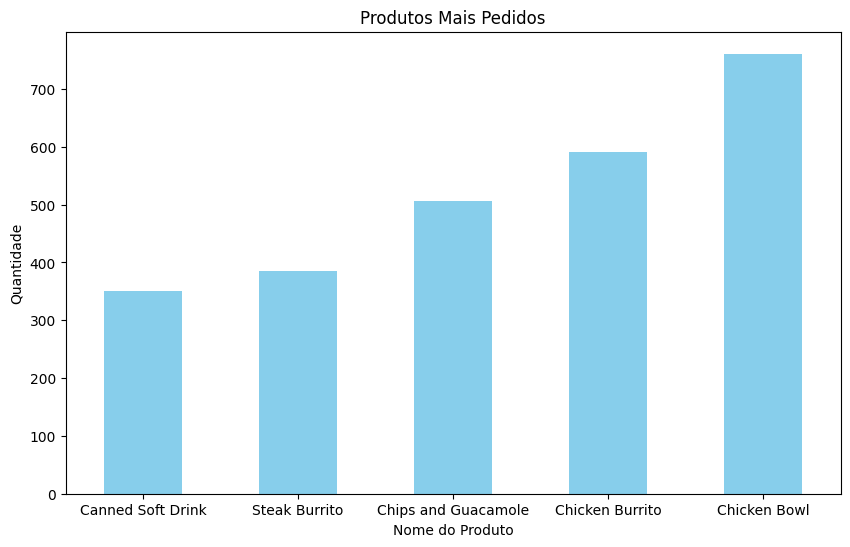

In [ ]:
# Criando o gráfico histograma
produtos_mais_pedidos.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Nome do Produto')
plt.xticks(rotation = 0)
plt.ylabel('Quantidade')
plt.title('Produtos Mais Pedidos')
plt.show()

In [ ]:
# R. Crie um gráfico de espalhamento onde em um eixo está o número de vezes que um pedido foi realizado e no outro eixo está o preço do produto

#Fazendo a média dos preços por produto
itens_por_preco = chipo[['quantity', 'item_name', 'item_price']]
itens_por_preco_agrupado = itens_por_preco.groupby('item_name').sum()
itens_por_preco_agrupado['price_mean'] = itens_por_preco_agrupado['item_price'] / itens_por_preco_agrupado['quantity']
itens_por_preco_agrupado

,quantity,item_price,price_mean
item_name,,,
6 Pack Soft Drink,55,356.95,6.490000
Barbacoa Bowl,66,672.36,10.187273
Barbacoa Burrito,91,894.75,9.832418
Barbacoa Crispy Tacos,12,120.21,10.017500
Barbacoa Salad Bowl,10,106.40,10.640000
Barbacoa Soft Tacos,25,250.46,10.018400
Bottled Water,211,302.56,1.433934
Bowl,4,29.60,7.400000
Burrito,6,44.40,7.400000


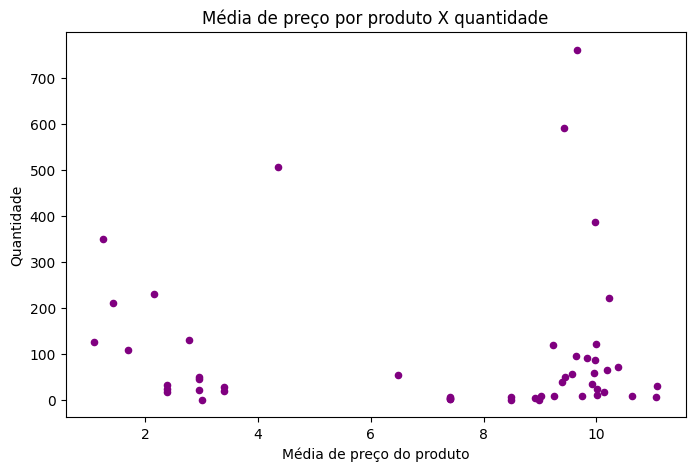

In [ ]:
# Fazendo scatter plot dos valores médios dos preços pela quantidade de produtos
itens_por_preco_agrupado.plot(x='price_mean', y='quantity', kind= 'scatter', color='purple', figsize=(8, 5))
plt.xlabel('Média de preço do produto')
plt.ylabel('Quantidade')
plt.title('Média de preço por produto X quantidade')
plt.show()

In [36]:
# S.Baseado no gráfico gerado, os dois eixos estão correlacionados? Justifique.

# Calcular a matriz de correlação entre 'price_mean' e 'quantity' e arredondar para 3 casas decimais
correlacao = itens_por_preco_agrupado[['price_mean', 'quantity']].corr().round(3)

# Criar um gráfico de calor com a matriz de correlação
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.3f')
plt.xlabel('Média de Preço')
plt.ylabel('Quantidade')
plt.title('Gráfico de Calor - Correlação entre Média de Preço por produto e Quantidade')
plt.show()

# Não são correlacionados,pois o valor de correlação entre essas variáveis foi de -0,047.


NameError: ignored